A Machine Learning Rating Engine experiment

In [1]:
import pandas as pd

data = pd.read_csv("au_auto_rater_liability.csv")

In [2]:
data.head()

,Annual kilometers,State,Business Use,Financing,Gender,Date of Birth,Liability Premium
0,15001-20000 kms,South Australia,Private,Yes,Female,1946-09-21,758.0
1,5001-10000 kms,"ACT, Tasmania and NT*",Private,Yes,Male,1951-11-23,511.0
2,5001-10000 kms,New South Wales,Rideshare,Yes,Female,1948-08-03,755.0
3,5001-10000 kms,South Australia,Rideshare,No,Male,1956-11-14,676.0
4,15001-20000 kms,New South Wales,Rideshare,No,Female,1942-07-20,1058.0


In [3]:
# Convert 'Date of Birth' to datetime
data['Date of Birth'] = pd.to_datetime(data['Date of Birth'])

In [4]:
from pycaret.regression import *

categorical_feat =['Annual kilometers', 'State', 'Business Use', 'Financing', 'Gender']
date_feat=['Date of Birth']

exp_regression = setup(data=data, target='Liability Premium', categorical_features=categorical_feat, date_features= date_feat, session_id=123)

,Description,Value
0,Session id,123
1,Target,Liability Premium
2,Target type,Regression
3,Original data shape,"(20, 7)"
4,Transformed data shape,"(20, 18)"
5,Transformed train set shape,"(14, 18)"
6,Transformed test set shape,"(6, 18)"
7,Ordinal features,2
8,Date features,1
9,Categorical features,5


In [5]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,308.1514,179262.9816,331.1772,nan,0.3479,0.3675,0.7730
lasso,Lasso Regression,415.1584,250346.7117,436.9247,nan,0.4925,0.5217,0.0110
ridge,Ridge Regression,203.5975,64661.2796,205.2814,nan,0.2134,0.2265,0.0090
en,Elastic Net,245.2152,111287.5420,250.6559,nan,0.2771,0.2982,0.0090
lar,Least Angle Regression,529241370987329920.0000,2671149024398464629491503820577964032.0000,530334453680912000.0000,nan,10.3537,826963163548485.2500,0.0100
llar,Lasso Least Angle Regression,391.8605,240719.1227,414.0159,nan,0.4387,0.4835,0.0090
omp,Orthogonal Matching Pursuit,329.4592,182635.9772,335.5221,nan,0.3639,0.4197,0.0090
br,Bayesian Ridge,334.8977,192878.2823,339.9047,nan,0.3651,0.4214,0.0090
par,Passive Aggressive Regressor,360.2328,174749.1497,374.4703,nan,0.4029,0.4111,0.0090
huber,Huber Regressor,308.6750,131583.1599,322.9502,nan,0.3338,0.3639,0.0090


LinearRegression(n_jobs=-1)

In [6]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,573.5000,330462.5000,574.8587,-0.8167,0.5603,0.7321
1,695.0000,483221.0000,695.1410,-2464.4133,0.6418,0.9009
2,573.5000,331452.5000,575.7191,-2.5865,0.4759,0.3572
3,464.5000,219182.5000,468.1693,-4.2411,0.4041,0.3701
4,165.0000,27225.0000,165.0000,nan,0.2793,0.2441
5,165.0000,27225.0000,165.0000,nan,0.2793,0.3229
6,134.0000,17956.0000,134.0000,nan,0.1572,0.1457
7,19.0000,361.0000,19.0000,nan,0.0295,0.0300
8,627.0000,393129.0000,627.0000,nan,0.6040,0.8305


In [7]:
# No need to fine tune but added for completeness
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,218.1667,47826.7222,218.6932,0.7371,0.2834,0.2964
1,31.3333,1177.7778,34.3188,-5.0091,0.0450,0.0403
2,731.8333,627996.0278,792.4620,-5.7953,0.5816,0.4150
3,348.8333,123352.0556,351.2151,-1.9496,0.3647,0.2891
4,82.8571,6865.3061,82.8571,nan,0.1155,0.1226
5,271.4286,73673.4694,271.4286,nan,0.4254,0.5312
6,196.0000,38416.0000,196.0000,nan,0.2393,0.2130
7,665.0000,442225.0000,665.0000,nan,0.7173,1.0506
8,7.4286,55.1837,7.4286,nan,0.0099,0.0098


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [8]:
print(dt)


DecisionTreeRegressor(random_state=123)


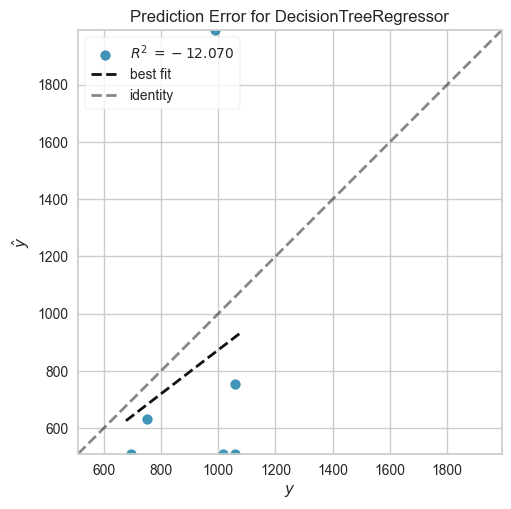

In [9]:
plot_model(dt, plot = 'error')

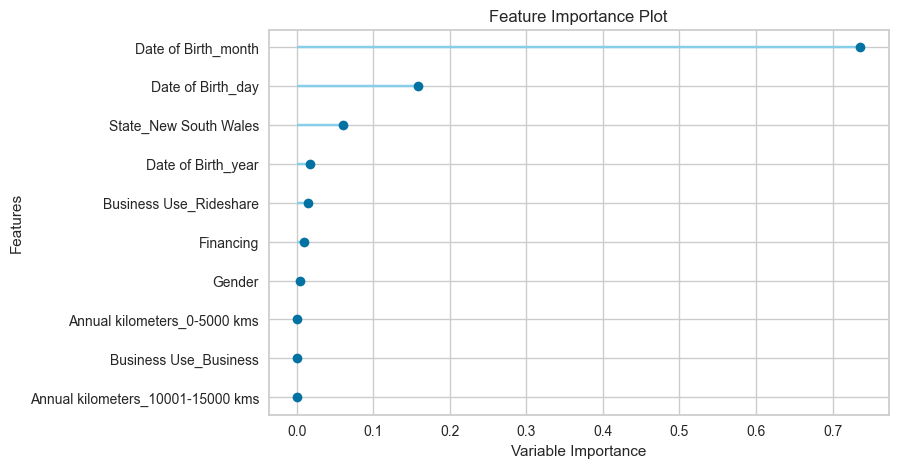

In [10]:
plot_model(dt, plot='feature')

In [11]:
final_model = finalize_model(dt)
save_model(final_model, 'rating_engine')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(include=['Date of Birth'],
                                     transformer=ExtractDateTimeFeatures())),
                 ('numerical_imputer',
                  TransformerWrapper(include=[], transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Annual kilometers', 'State',
                                              'Business Use', 'Financing',
                                              'Gender'],
                                     t...
                 ('onehot_encoding',
                  TransformerWrapper(include=['Annual kilometers', 'State',
                                              'Business Use'],
                                     transformer=OneHotEncoder(cols=['Annual '
                                                                     'kilometers',
                          

In [12]:
saved_model = load_model('rating_engine')

Transformation Pipeline and Model Successfully Loaded


In [13]:
from sklearn.model_selection import train_test_split

X = data.drop('Liability Premium', axis=1)  # Assuming 'Expected Premium' is the target
y = data['Liability Premium']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_pipe = saved_model[:-1].transform(X_train)




In [14]:
import shap

# Create the SHAP explainer object
explainer = shap.Explainer(dt,train_pipe)

In [15]:
shap_values = explainer(train_pipe)

In [16]:
shap.initjs()

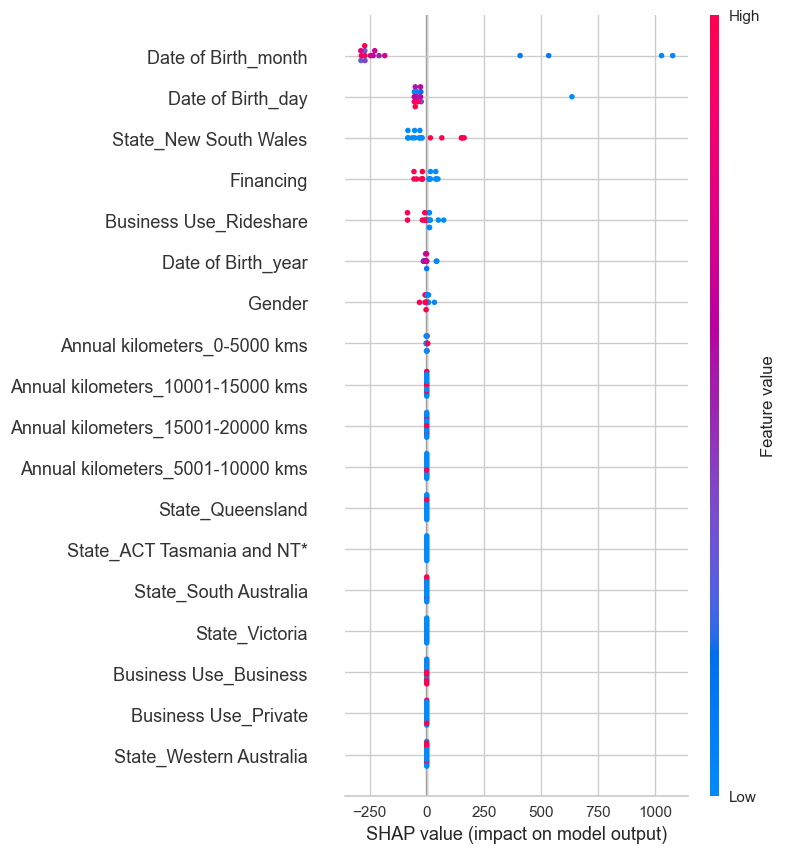

In [17]:
shap.summary_plot(shap_values, train_pipe)


In [19]:
idx = 10
# Create a force plot for the specified house index
shap.force_plot(shap_values[idx])

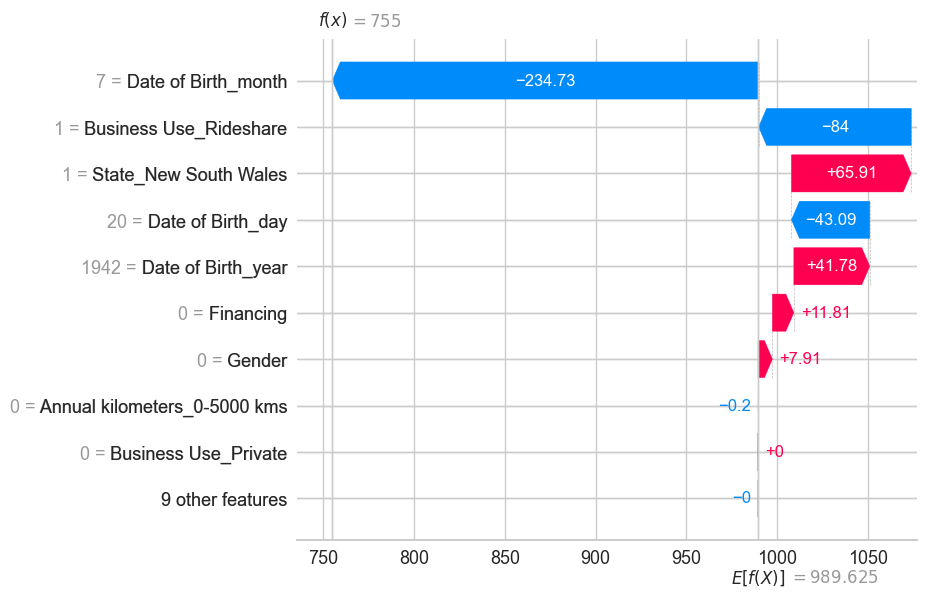

In [20]:
shap.plots.waterfall(shap_values[idx])

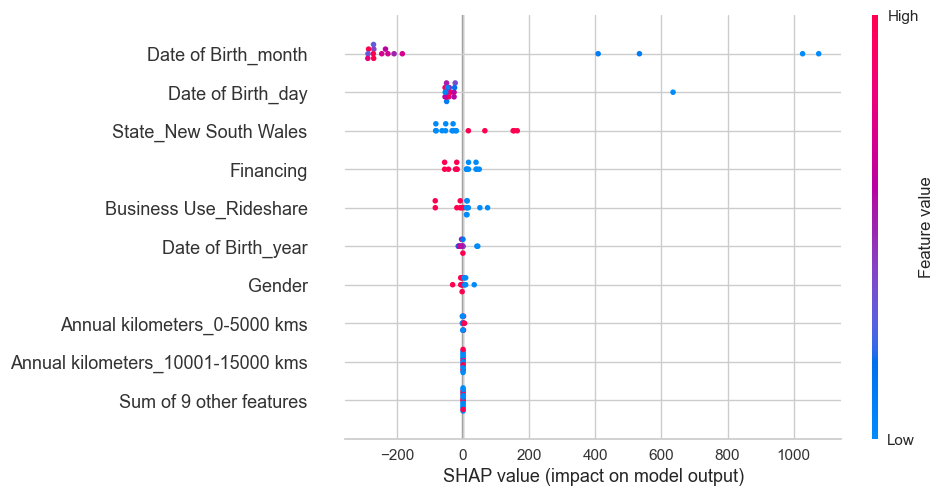

In [21]:
shap.plots.beeswarm(shap_values)

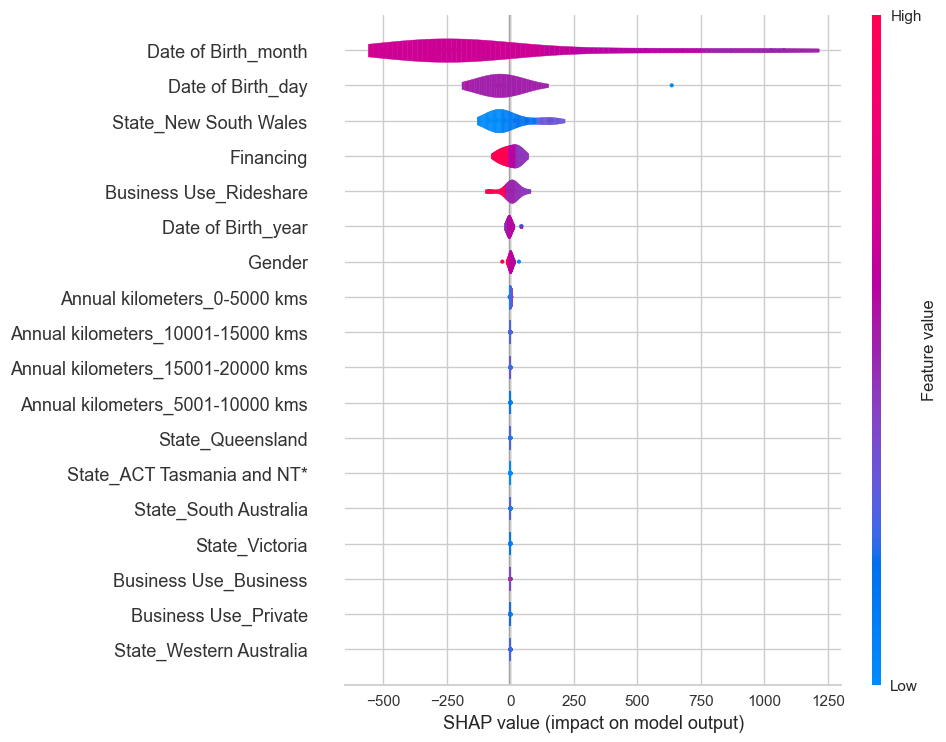

In [22]:
shap.plots.violin(shap_values)